## Balancing Transport and Physical Layers in Wireless Multihop Networks: Jointly Optimal Congestion Control and Power Control


In [16]:
L=60;
G=rand(L,L);
p=ones(1,L)*10; #if this is a low value, projection is needed to keep power positive
cump=[p];
nb_steps = 500;

k=0.001;
epsilon=1e-6;
n=1e-6;

In [12]:
for s = 1:500
    for l=1:L
        partial_grad = 0;
        for j=1:L
            if j == l
                continue;
            else
                interf = 0;
                for k=1:L
                    if k==j
                        continue;
                    else
                        interf = interf + G[j,k]*p[k];
                    end
                end
                partial_grad = partial_grad + (G[j,l]/(interf+n));
            end 
        end
        p[l] = p[l] + k*(1/p[l] - partial_grad);
    end
    if(norm(p-cump[end,:]))<epsilon
        break;
    end
    cump=[cump;p];
end

In [13]:
s=size(cump)[1];
x = [1:s];

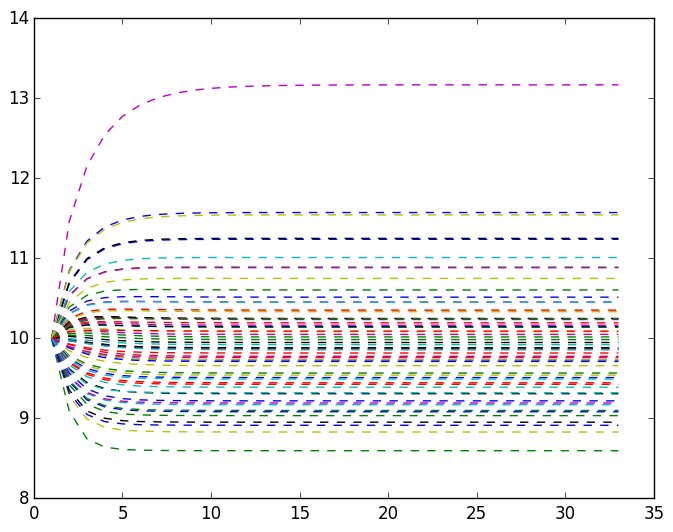

In [14]:
using PyPlot
plot(x, cump,"--");